In [23]:
#importing modules
import pandas as pd 

In [24]:
#loading original text file
file = pd.read_csv('F:\\datasets\\argentina_cars.csv')
df = file.copy()
df.sample(10)

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
328,8250000,Volkswagen,Amarok,2018,Plateado,Diésel,4.0,Automática,2.0,Pick-Up,50000,pesos
493,3998700,Ford,Ecosport,2016,Negro,Nafta,5.0,Manual,1.6,SUV,80000,pesos
6,25000,Kia,Sorento,2014,Negro,Diésel,5.0,Automática,2.2,SUV,156000,dólares
415,34900,Honda,CR-V,2016,Negro,Nafta,5.0,Automática,2.4,SUV,62000,dólares
134,115700,BMW,Serie M,2017,Gris,Nafta,2.0,Automática,3.0,Coupé,11000,dólares
251,7950000,Nissan,Sentra,2020,Blanco,Nafta,4.0,Automática,2.0,Sedán,30000,pesos
97,7550000,Volkswagen,Nivus,2021,Blanco,Nafta,5.0,Automática,1.0,SUV,34000,pesos
509,2890000,Toyota,Etios,2015,Gris,Nafta,5.0,Manual,1.5,Hatchback,84000,pesos
334,2440000,Renault,Fluence,2013,Dorado,Nafta,4.0,Manual,1.6,Sedán,45000,pesos
61,3990000,Peugeot,208,2021,Gris,Nafta,5.0,Manual,1.6,Hatchback,7400,pesos


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   money       510 non-null    int64  
 1   brand       510 non-null    object 
 2   model       510 non-null    object 
 3   year        510 non-null    int64  
 4   color       499 non-null    object 
 5   fuel_type   510 non-null    object 
 6   door        510 non-null    float64
 7   gear        509 non-null    object 
 8   motor       499 non-null    object 
 9   body_type   509 non-null    object 
 10  kilometres  510 non-null    int64  
 11  currency    510 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 47.9+ KB


In [26]:
df.isnull().sum()

money          0
brand          0
model          0
year           0
color         11
fuel_type      0
door           0
gear           1
motor         11
body_type      1
kilometres     0
currency       0
dtype: int64

In [27]:
#value counts in each column of data frame
for col in df.columns:
    print(col)
    print(df[col].value_counts(ascending=False))

money
3150000     7
3000000     6
2800000     6
3600000     5
3189900     5
           ..
60000       1
95000       1
3780000     1
10850000    1
44900       1
Name: money, Length: 343, dtype: int64
brand
Volkswagen       88
Ford             57
Chevrolet        51
Peugeot          49
Toyota           47
Renault          45
Citroën          32
Fiat             25
Jeep             20
Honda            18
Mercedes-Benz    14
BMW              13
Hyundai           9
Nissan            8
Audi              8
RAM               6
Dodge             4
Kia               3
Mitsubishi        2
Volvo             2
Mini              2
DS                2
Baic              1
Subaru            1
Chery             1
Suzuki            1
Porsche           1
Name: brand, dtype: int64
model
Amarok       17
208          13
Corolla      13
Focus III    13
Hilux        12
             ..
207           1
A4            1
Equinox       1
Linea         1
Aveo          1
Name: model, Length: 157, dtype: int64
year
201

In [28]:
#converting dollar to pesos
df_lst = df.to_numpy()
new_lst = []
carrier = []
for i in df_lst :
    if i[-1] == 'dólares' :
        val = i[0] * 173.6
        carrier.append(val)
        for j in i[1:]:
            carrier.append(j)
        new_lst.append(carrier)
        carrier = []
        continue
    new_lst.append(i)
new_df = pd.DataFrame(new_lst,columns=df.columns)
#we do not need "currency" column anymore
new_df = new_df.drop(['currency'],axis=1)
new_df.sample(15)

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres
59,2690000.0,Nissan,Tiida,2013,Dorado,Nafta,5.0,Manual,1.8,Hatchback,96000
260,7899900.0,Volkswagen,Amarok,2018,Blanco,Diésel,4.0,Manual,2.0,Pick-Up,79000
1,10850000.0,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500
371,5990000.0,Kia,Cerato,2020,Blanco,Nafta,4.0,Automática,2.0,Sedán,86000
192,3490000.0,Fiat,Argo,2019,Gris,Nafta,5.0,Manual,1.3,Hatchback,18000
461,74648000.0,Audi,R8 Coupé,2020,Azul,Nafta,2.0,Automática,5.2,Coupé,3000
502,3190000.0,Peugeot,3008,2013,Negro,Nafta,5.0,Manual,1.6,Monovolumen,135000
106,2150000.0,Ford,Focus III,2014,Plateado,Nafta,4.0,Manual,2.0,Sedán,57000
207,1750000.0,Volkswagen,Gol Trend,2009,Plateado,Nafta,5.0,Manual,1.6,Hatchback,119000
200,3990000.0,Volkswagen,Suran Cross,2016,Gris,Nafta,5.0,Manual,1.6,Monovolumen,39000


In [29]:
new_df['money'].describe()

count    5.100000e+02
mean     5.304411e+06
std      4.769101e+06
min      1.200000e+06
25%      2.907500e+06
50%      3.990000e+06
75%      6.300000e+06
max      7.464800e+07
Name: money, dtype: float64

In [30]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   money       510 non-null    float64
 1   brand       510 non-null    object 
 2   model       510 non-null    object 
 3   year        510 non-null    int64  
 4   color       499 non-null    object 
 5   fuel_type   510 non-null    object 
 6   door        510 non-null    float64
 7   gear        509 non-null    object 
 8   motor       499 non-null    object 
 9   body_type   509 non-null    object 
 10  kilometres  510 non-null    int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 44.0+ KB


In [31]:
new_df.isnull().sum()

money          0
brand          0
model          0
year           0
color         11
fuel_type      0
door           0
gear           1
motor         11
body_type      1
kilometres     0
dtype: int64

In [32]:
for col in new_df.columns:
    print(col)
    print(new_df[col].value_counts(ascending=False))

money
3150000.0     7
3000000.0     6
2800000.0     6
3600000.0     5
3189900.0     5
             ..
10416000.0    1
16492000.0    1
3780000.0     1
10850000.0    1
7794640.0     1
Name: money, Length: 343, dtype: int64
brand
Volkswagen       88
Ford             57
Chevrolet        51
Peugeot          49
Toyota           47
Renault          45
Citroën          32
Fiat             25
Jeep             20
Honda            18
Mercedes-Benz    14
BMW              13
Hyundai           9
Nissan            8
Audi              8
RAM               6
Dodge             4
Kia               3
Mitsubishi        2
Volvo             2
Mini              2
DS                2
Baic              1
Subaru            1
Chery             1
Suzuki            1
Porsche           1
Name: brand, dtype: int64
model
Amarok       17
208          13
Corolla      13
Focus III    13
Hilux        12
             ..
207           1
A4            1
Equinox       1
Linea         1
Aveo          1
Name: model, Length: 157,

In [33]:
#getting objective columns seperated
label = new_df['money']
brand = new_df['brand']
model = new_df['model']
f_type = new_df['fuel_type']
motor = new_df['motor'].to_numpy().reshape(-1,1)
gear = new_df['gear'].to_numpy().reshape(-1,1)
b_type = new_df['body_type'].to_numpy().reshape(-1,1)
color = new_df['color'].to_numpy().reshape(-1,1)
new_df = new_df.drop(['motor','gear','body_type','color','money','brand','model','fuel_type'],axis = 1)

In [34]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer_mf = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [35]:
#filling missin values by 'most_frequent' method
imputed_gear = pd.DataFrame(imputer_mf.fit_transform(gear))
imputed_b_type = pd.DataFrame(imputer_mf.fit_transform(b_type))
imputed_color = pd.DataFrame(imputer_mf.fit_transform(color))
imputed_motor = pd.DataFrame(imputer_mf.fit_transform(motor))

In [36]:
#encoding all of objective columns
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_brand = pd.DataFrame(encoder.fit_transform(brand),columns=['brand'])
encoded_model = pd.DataFrame(encoder.fit_transform(model),columns=['model'])
encoded_f_type = pd.DataFrame(encoder.fit_transform(f_type),columns=['fuel_type'])
encoded_b_type = pd.DataFrame(encoder.fit_transform(imputed_b_type),columns=['body_type'])
encoded_color = pd.DataFrame(encoder.fit_transform(imputed_color),columns=['color'])
encoded_motor = pd.get_dummies(imputed_motor)
encoded_gear = pd.get_dummies(imputed_gear)

C:\Users\pouria_z\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [37]:
ready_df = pd.concat([new_df,encoded_brand,encoded_model,encoded_f_type,encoded_b_type,encoded_color,encoded_motor,encoded_gear],axis=1)
ready_df.head()

,year,door,kilometres,brand,model,fuel_type,body_type,color,0_1.0,0_1.2,...,0_3.5,0_3.6,0_4.4,0_5.2,0_5.7,0_6.4,0_TOYOTA 2.8,0_TURBO,0_Automática,0_Manual
0,2022,5.0,500,24,47,2,8,10,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2022,5.0,500,12,43,2,8,2,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2022,5.0,500,12,43,2,8,6,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2022,5.0,550,5,28,2,8,6,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2019,4.0,9000,24,46,2,9,5,0,0,...,0,0,0,0,0,0,0,0,0,1


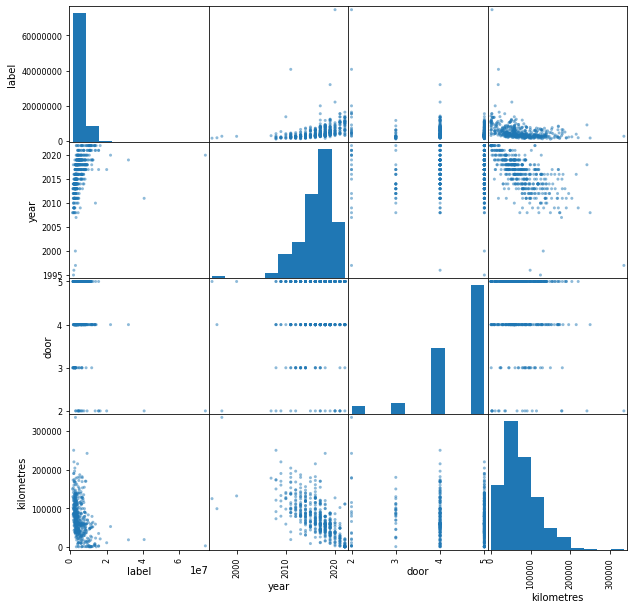

In [38]:
#finding any relate in numeric columns with label
import matplotlib.pyplot as plt
ready_df['label'] = label
pd.plotting.scatter_matrix(ready_df[['label','year','door','kilometres']],figsize=(10,10))
plt.show()

In [39]:
ready_df = ready_df.drop(['label'],axis=1)

In [40]:
#scaling our data frame
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(ready_df),columns=ready_df.columns)
scaled_df.sample(10)

,year,door,kilometres,brand,model,fuel_type,body_type,color,0_1.0,0_1.2,...,0_3.5,0_3.6,0_4.4,0_5.2,0_5.7,0_6.4,0_TOYOTA 2.8,0_TURBO,0_Automática,0_Manual
468,0.189003,-0.623728,-0.415965,1.148791,-0.591321,0.340017,1.216384,1.446213,-0.141421,-0.15523,...,-0.044324,-0.088911,-0.044324,-0.062746,-0.109109,-0.044324,-0.044324,-0.044324,1.190404,-1.190404
432,0.457502,-0.623728,0.975125,1.271824,1.701178,0.340017,1.216384,-0.071418,-0.141421,-0.15523,...,-0.044324,-0.088911,-0.044324,-0.062746,-0.109109,-0.044324,-0.044324,-0.044324,-0.840051,0.840051
376,0.189003,-0.623728,0.183274,1.271824,1.745264,0.340017,1.216384,-0.071418,-0.141421,-0.15523,...,-0.044324,-0.088911,-0.044324,-0.062746,-0.109109,-0.044324,-0.044324,-0.044324,-0.840051,0.840051
492,0.457502,0.690740,-0.886796,0.410593,-1.539181,0.340017,-1.038089,-0.071418,-0.141421,-0.15523,...,-0.044324,-0.088911,-0.044324,-0.062746,-0.109109,-0.044324,-0.044324,-0.044324,1.190404,-1.190404
158,0.457502,0.690740,-0.116346,-0.327606,0.885577,0.340017,0.840638,2.053266,-0.141421,-0.15523,...,-0.044324,-0.088911,-0.044324,-0.062746,-0.109109,-0.044324,-0.044324,-0.044324,1.190404,-1.190404
174,-0.884996,0.690740,0.868118,-0.081540,-0.789710,0.340017,-1.038089,1.142687,-0.141421,-0.15523,...,-0.044324,-0.088911,-0.044324,-0.062746,-0.109109,-0.044324,-0.044324,-0.044324,-0.840051,0.840051
292,-0.347996,0.690740,-0.201952,1.271824,1.348485,0.340017,-0.286598,1.446213,-0.141421,-0.15523,...,-0.044324,-0.088911,-0.044324,-0.062746,-0.109109,-0.044324,-0.044324,-0.044324,-0.840051,0.840051
248,-0.884996,0.690740,0.099808,-1.188837,-0.392932,0.340017,-1.038089,-0.981997,-0.141421,-0.15523,...,-0.044324,-0.088911,-0.044324,-0.062746,-0.109109,-0.044324,-0.044324,-0.044324,1.190404,-1.190404
273,-0.347996,0.690740,0.097668,-0.696705,-0.062283,0.340017,-1.038089,-0.981997,-0.141421,-0.15523,...,-0.044324,-0.088911,-0.044324,-0.062746,-0.109109,-0.044324,-0.044324,-0.044324,1.190404,-1.190404
286,1.531500,0.690740,-1.582342,0.410593,-1.539181,0.340017,-1.038089,1.142687,-0.141421,-0.15523,...,-0.044324,-0.088911,-0.044324,-0.062746,-0.109109,-0.044324,-0.044324,-0.044324,-0.840051,0.840051


In [49]:
#split our DF to train and test data
from sklearn.model_selection import train_test_split
xtr , xts , ytr , yts = train_test_split(scaled_df,label,test_size=0.1,random_state=40)
print(len(xtr),len(ytr))
print(len(xts),len(yts))

459 459
51 51


In [50]:
#creating model to predict and getting score 
from sklearn.ensemble import RandomForestRegressor
alg = RandomForestRegressor().fit(xtr,ytr)
alg.score(xtr,ytr)*100

91.43858016217237

In [51]:
alg.score(xts,yts)*100

86.90740051495966

In [52]:
alg.score(scaled_df,label)*100

90.74780500255592